# Temperature Prediction
This dataset was obtained from Kaggle and it comprises weather data for New Delhi, India. It includes various features such as temperature, pressure, humidity, rain, precipitation, and more.<br>
Link to dataset: https://www.kaggle.com/datasets/mahirkukreja/delhi-weather-data



In [8]:
#import neccessary packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import tensorflow as tf

## Reading the data in 

In [9]:
df = pd.read_csv("temp.csv",parse_dates=["datetime_utc"],index_col = "datetime_utc")
df.head(20)

,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
datetime_utc,,,,,,,,,,,,,,,,,,,
1996-11-01 11:00:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1996-11-01 12:00:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
1996-11-01 13:00:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
1996-11-01 14:00:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
1996-11-01 16:00:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0
1996-11-01 17:00:00,Smoke,12.0,0,0,NaN,56.0,NaN,1011.0,0,0,21.0,0,0,NaN,0.0,North,NaN,NaN,NaN
1996-11-01 18:00:00,Smoke,13.0,0,0,NaN,60.0,NaN,1010.0,0,0,21.0,0,0,0.8,0.0,North,NaN,NaN,0.0
1996-11-01 19:00:00,Smoke,13.0,0,0,NaN,60.0,NaN,-9999.0,0,0,21.0,0,0,NaN,0.0,North,NaN,NaN,NaN
1996-11-01 20:00:00,Smoke,13.0,0,0,NaN,68.0,NaN,-9999.0,0,0,19.0,0,0,NaN,0.0,North,NaN,NaN,NaN


parse_dates: This allows you to convert data into proper datetime types


index_col: This is to allow you to set which columns to be used as the index of the dataframe

## Data Exploration

In [10]:
#shape of data
df.shape

(100990, 19)

In [11]:
#Statistical summary of the dataset 
df.describe()

,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wgustm,_windchillm,_wspdm
count,100369.000000,100990.000000,100990.000000,29155.000000,100233.000000,0.0,1.007580e+05,100990.000000,100990.000000,100317.000000,100990.000000,100990.00000,96562.000000,86235.000000,1072.000000,579.000000,98632.000000
mean,15.741205,0.069690,0.000129,35.651710,57.909481,NaN,1.932331e+03,0.026260,0.000010,25.451269,0.009427,0.00002,2.402774,163.549974,37.671175,5.713817,7.678463
std,7.058587,0.254625,0.011345,5.015384,23.807771,NaN,3.183786e+05,0.159908,0.003147,8.482859,0.096633,0.00445,20.746028,120.002076,6.848666,1.203290,11.932157
min,-24.000000,0.000000,0.000000,26.800000,4.000000,NaN,-9.999000e+03,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,25.900000,2.100000,0.000000
25%,10.000000,0.000000,0.000000,31.700000,39.000000,NaN,1.002000e+03,0.000000,0.000000,19.000000,0.000000,0.00000,1.500000,50.000000,33.300000,4.900000,0.000000
50%,15.000000,0.000000,0.000000,35.100000,59.000000,NaN,1.008000e+03,0.000000,0.000000,27.000000,0.000000,0.00000,2.000000,160.000000,37.000000,6.100000,7.400000
75%,22.000000,0.000000,0.000000,39.200000,78.000000,NaN,1.014000e+03,0.000000,0.000000,32.000000,0.000000,0.00000,3.000000,270.000000,40.700000,6.800000,11.100000
max,75.000000,1.000000,1.000000,73.600000,243.000000,NaN,1.010614e+08,1.000000,1.000000,90.000000,1.000000,1.00000,6436.000000,960.000000,92.600000,7.300000,1514.900000


In [12]:
#average weather condition by year
df.resample('Y').mean()

,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wgustm,_windchillm,_wspdm
datetime_utc,,,,,,,,,,,,,,,,,
1996-12-31,5.992851,0.064945,0.000000,27.200000,53.676728,NaN,653.453052,0.000000,0.000000,16.518636,0.000000,0.000000,2.198981,106.666667,NaN,4.957143,5.052735
1997-12-31,17.052394,0.085828,0.000000,36.610203,68.217885,NaN,731.160755,0.030861,0.000000,24.444635,0.010748,0.000000,3.019983,138.686320,36.697647,5.730000,9.351890
1998-12-31,17.711256,0.095557,0.000000,36.446695,69.775042,NaN,804.928360,0.039396,0.000000,24.847371,0.011456,0.000000,2.461202,127.001397,40.994444,5.484211,7.112116
1999-12-31,14.609585,0.060159,0.000000,34.400058,49.845674,NaN,16987.102000,0.016190,0.000000,27.335731,0.007302,0.000159,2.836702,138.841429,37.489815,6.240000,7.717482
2000-12-31,15.346326,0.076980,0.000185,34.823648,62.598992,NaN,934.518086,0.020033,0.000000,23.865647,0.005565,0.000000,2.498489,143.721017,37.132787,6.326531,8.046553
2001-12-31,14.510659,0.061169,0.000000,34.729637,54.657628,NaN,842.766869,0.017375,0.000000,25.582460,0.011067,0.000000,2.657798,160.131263,38.685915,5.596460,8.915498
2002-12-31,14.245218,0.052805,0.000000,36.404884,52.079976,NaN,886.813478,0.016935,0.000000,26.481948,0.006351,0.000000,2.401434,156.452664,36.903165,6.336735,9.279368
2003-12-31,16.007271,0.071364,0.000000,36.094588,59.974653,NaN,921.269202,0.023510,0.000000,26.176556,0.006143,0.000000,2.641837,141.641893,36.730208,5.297561,8.396358
2004-12-31,13.827287,0.072888,0.000109,34.655294,52.832196,NaN,940.680545,0.013769,0.000000,26.004396,0.007322,0.000000,3.358626,157.365482,38.877253,5.845378,9.431504


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100990 entries, 1996-11-01 11:00:00 to 2017-04-24 18:00:00
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0    _conds       100918 non-null  object 
 1    _dewptm      100369 non-null  float64
 2    _fog         100990 non-null  int64  
 3    _hail        100990 non-null  int64  
 4    _heatindexm  29155 non-null   float64
 5    _hum         100233 non-null  float64
 6    _precipm     0 non-null       float64
 7    _pressurem   100758 non-null  float64
 8    _rain        100990 non-null  int64  
 9    _snow        100990 non-null  int64  
 10   _tempm       100317 non-null  float64
 11   _thunder     100990 non-null  int64  
 12   _tornado     100990 non-null  int64  
 13   _vism        96562 non-null   float64
 14   _wdird       86235 non-null   float64
 15   _wdire       86235 non-null   object 
 16   _wgustm      1072 non-null    float64
 17   _windchillm  

In [14]:
df.value_counts(" _conds")

 _conds
Haze                             47602
Smoke                            20760
Mist                              9375
Clear                             3129
Widespread Dust                   2856
Fog                               2760
Scattered Clouds                  2209
Partly Cloudy                     2091
Shallow Fog                       1860
Mostly Cloudy                     1537
Light Rain                        1302
Partial Fog                       1031
Patches of Fog                     901
Thunderstorms and Rain             486
Heavy Fog                          421
Light Drizzle                      414
Rain                               394
Unknown                            383
Blowing Sand                       378
Overcast                           326
Thunderstorm                       192
Light Thunderstorms and Rain       176
Drizzle                            112
Light Fog                           64
Light Thunderstorm                  64
Heavy Rain       

<AxesSubplot:xlabel='datetime_utc'>

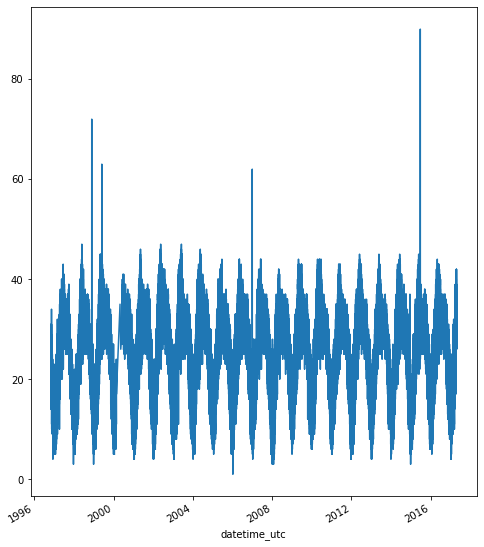

In [15]:
# We visualize the temperature across all the years using matplotlib
plt.figure(figsize=(8,10))
temp = df[' _tempm']
temp.plot()

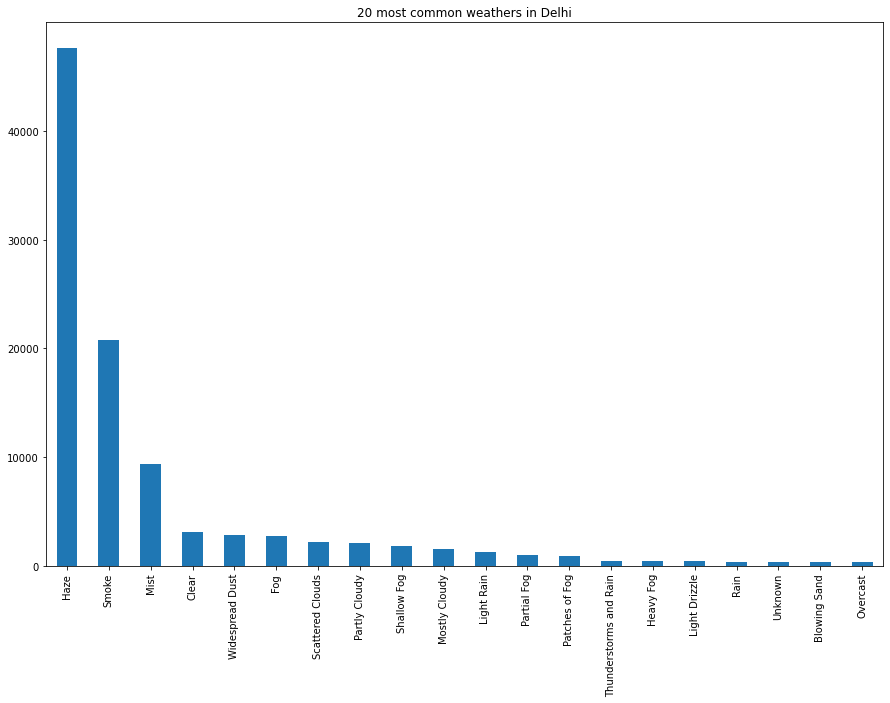

In [16]:
plt.figure(figsize=(15,10))
df[' _conds'].value_counts().head(20).plot(kind='bar')

plt.title('20 most common weathers in Delhi')
plt.show()

According to the dataset, the prevailing weather condition in the given years was Haze, followed by smoke. Furthermore, the data indicates a notable absence of rainfall during those years.

## Preprocessing

In [17]:
df_copy = pd.read_csv("temp.csv")
df_copy

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100985,20170424-06:00,Haze,17.0,0,0,NaN,25.0,NaN,1005.0,0,0,34.0,0,0,4.0,320.0,NW,NaN,NaN,11.1
100986,20170424-09:00,Haze,14.0,0,0,NaN,16.0,NaN,1003.0,0,0,38.0,0,0,4.0,320.0,NW,NaN,NaN,22.2
100987,20170424-12:00,Haze,12.0,0,0,NaN,14.0,NaN,1002.0,0,0,36.0,0,0,4.0,270.0,West,NaN,NaN,18.5
100988,20170424-15:00,Haze,15.0,0,0,NaN,27.0,NaN,1004.0,0,0,32.0,0,0,2.0,320.0,NW,NaN,NaN,3.7


In [18]:
tempa = df_copy[' _tempm']

In [23]:
#checking for  null cells
tempa.isnull().sum()

673

In [24]:
#filling the null values with next value
tempa.fillna(method="bfill")

0         30.0
1         28.0
2         24.0
3         24.0
4         23.0
          ... 
100985    34.0
100986    38.0
100987    36.0
100988    32.0
100989    30.0
Name:  _tempm, Length: 100990, dtype: float64

In [26]:
tempa.dropna(inplace=True)

In [27]:
tempa.isnull().sum()

0

In [28]:
#The purpose of this function is to convert the DataFrame 
#into two arrays, X and Y, which will be used for training
def df_to_X_y(df, size=7):
    df_as_np = df.to_numpy()
    X = []
    Y = []
    for i in range(len(df_as_np)-size):
        row = [[a] for a in df_as_np[i:i+7]]
        X.append(row)
        label = df_as_np[i+7]
        Y.append(label)
    return np.array(X),np.array(Y)
        

In [29]:
#By passing the temperature values, a sequence is constructed that can be utilized for training purposes.
size = 7
x,y = df_to_X_y(tempa, size)
x.shape, y.shape

((100310, 7, 1), (100310,))

In [30]:
x

array([[[30.],
        [28.],
        [24.],
        ...,
        [23.],
        [21.],
        [21.]],

       [[28.],
        [24.],
        [24.],
        ...,
        [21.],
        [21.],
        [21.]],

       [[24.],
        [24.],
        [23.],
        ...,
        [21.],
        [21.],
        [19.]],

       ...,

       [[33.],
        [30.],
        [29.],
        ...,
        [28.],
        [34.],
        [38.]],

       [[30.],
        [29.],
        [26.],
        ...,
        [34.],
        [38.],
        [36.]],

       [[29.],
        [26.],
        [28.],
        ...,
        [38.],
        [36.],
        [32.]]])

In [31]:
y

array([21., 19., 19., ..., 36., 32., 30.])

## train/test split

Splitting the dataset into training, validation and test samples

In [32]:
X_train, Y_train = x[:70000],y[:70000]
X_val, Y_val = x[70000:80000],y[70000:80000]
X_test, Y_test = x[80000:],y[80000:]
X_train.shape, Y_train.shape, X_val.shape, Y_val.shape, X_test.shape, Y_test.shape

((70000, 7, 1), (70000,), (10000, 7, 1), (10000,), (20310, 7, 1), (20310,))

In [33]:
X_train

array([[[30.],
        [28.],
        [24.],
        ...,
        [23.],
        [21.],
        [21.]],

       [[28.],
        [24.],
        [24.],
        ...,
        [21.],
        [21.],
        [21.]],

       [[24.],
        [24.],
        [23.],
        ...,
        [21.],
        [21.],
        [19.]],

       ...,

       [[16.],
        [15.],
        [16.],
        ...,
        [28.],
        [24.],
        [18.]],

       [[15.],
        [16.],
        [26.],
        ...,
        [24.],
        [18.],
        [16.]],

       [[16.],
        [26.],
        [28.],
        ...,
        [18.],
        [16.],
        [15.]]])

## Model Creation

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [35]:
model = Sequential()
model.add(InputLayer((7,1)))
model.add(LSTM(units=100, return_sequences=True, activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True, activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True, activation='relu'))
model.add(LSTM(units=100, return_sequences=True, activation='relu'))
model.add(Bidirectional(LSTM(128, activation='relu')))
model.add(Dense(100, activation='relu'))
model.add(Dense(1,'linear'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 7, 100)            40800     
                                                                 
 dropout_2 (Dropout)         (None, 7, 100)            0         
                                                                 
 lstm_6 (LSTM)               (None, 7, 100)            80400     
                                                                 
 dropout_3 (Dropout)         (None, 7, 100)            0         
                                                                 
 lstm_7 (LSTM)               (None, 7, 100)            80400     
                                                                 
 lstm_8 (LSTM)               (None, 7, 100)            80400     
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)             

In [36]:
cp = ModelCheckpoint('model',save_best_only=True) 
model.compile(loss=MeanSquaredError() , optimizer=Adam(learning_rate=0.0001) , metrics=[RootMeanSquaredError()])

In [37]:
model.fit(X_train, Y_train, validation_data=(X_val,Y_val) ,epochs=10, callbacks = [cp])

Epoch 1/10
2188/2188 [==============================] - ETA: 0s - loss: 27.7471 - root_mean_squared_error: 5.2676

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


2188/2188 [==============================] - 61s 26ms/step - loss: 27.7471 - root_mean_squared_error: 5.2676 - val_loss: 14.8134 - val_root_mean_squared_error: 3.8488
Epoch 2/10
2188/2188 [==============================] - 52s 24ms/step - loss: 5.2450 - root_mean_squared_error: 2.2902 - val_loss: 19.4061 - val_root_mean_squared_error: 4.4052
Epoch 3/10
2188/2188 [==============================] - 54s 25ms/step - loss: 4.4512 - root_mean_squared_error: 2.1098 - val_loss: 16.3989 - val_root_mean_squared_error: 4.0496
Epoch 4/10
2188/2188 [==============================] - 72s 33ms/step - loss: 4.0027 - root_mean_squared_error: 2.0007 - val_loss: 16.8986 - val_root_mean_squared_error: 4.1108
Epoch 5/10
2188/2188 [==============================] - 66s 30ms/step - loss: 3.7305 - root_mean_squared_error: 1.9314 - val_loss: 22.6964 - val_root_mean_squared_error: 4.7641
Epoch 6/10
2188/2188 [==============================] - 70s 32ms/step - loss: 3.5370 - root_mean_squared_error: 1.8807 - val_

### Model Evaluation

In [38]:
#loading the best model(model with the lowest validation loss)
from tensorflow.keras.models import load_model
model = load_model('model')

In [42]:
train_predictions = model.predict(X_train).flatten()
train_result = pd.DataFrame(data={"Train prediction":train_predictions,"Actual":Y_train})
train_result

2188/2188 [==============================] - 13s 6ms/step


,Train prediction,Actual
0,19.197567,21.0
1,19.116188,19.0
2,17.122753,19.0
3,16.554098,19.0
4,16.644894,19.0
...,...,...
69995,26.438047,24.0
69996,22.851208,18.0
69997,16.116705,16.0
69998,13.013435,15.0


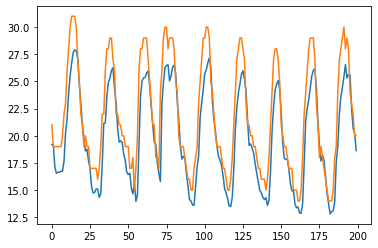

In [45]:
#plotting the result to graphically view the loss
plt.plot(train_result[:200])

In [49]:
val_predictions = model.predict(X_val).flatten()
val_result = pd.DataFrame(data={"Val prediction":val_predictions,"Actual":Y_val})
val_result

313/313 [==============================] - 2s 6ms/step


,Val prediction,Actual
0,16.604904,16.0
1,17.419588,26.0
2,24.494707,28.0
3,24.937283,24.0
4,22.749342,18.0
...,...,...
9995,25.612555,28.0
9996,25.586052,28.0
9997,25.506165,28.0
9998,25.506165,28.0


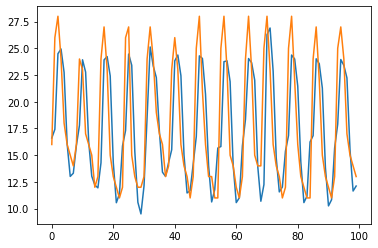

In [50]:
plt.plot(val_result[:100])

In [52]:
test_predictions = model.predict(X_test).flatten()
test_result = pd.DataFrame(data={"Test prediction":test_predictions,"Actual":Y_test})
test_result

635/635 [==============================] - 4s 6ms/step


,Test prediction,Actual
0,25.506165,28.0
1,25.506165,28.0
2,25.506165,28.0
3,25.506165,28.0
4,25.506165,28.0
...,...,...
20305,26.730795,34.0
20306,32.231312,38.0
20307,33.864029,36.0
20308,32.744743,32.0


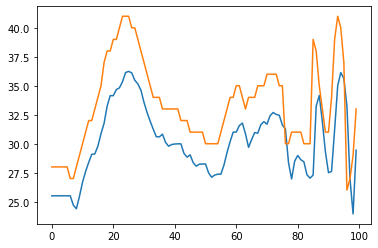

In [53]:
plt.plot(test_result[:100])

## Conclusion

The model was trained without any tuning, so there is still potential for further improvementss such as regularization techniques and hyperparameter tuning to better improve the model 